In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.ticker as plticker
import math
from sklearn.model_selection import train_test_split
#classifer is more appropriate for binary outout (RandomForestRegressor gives a range)
#one hot encoding will convert column strings to binaries
#make dummies pandas is a function that will do one hot encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import classification_report

In [2]:
df_dec = pd.read_csv('COVID_Cases_Restricted_Detailed_12042020.csv')
df_dec.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years


In [3]:
print(df_dec['death_yn'].value_counts())

No         3690813
Missing    3486923
Unknown    1043766
Yes         183577
Name: death_yn, dtype: int64


In [4]:
death_df = df_dec.loc[(df_dec['death_yn'] == 'Yes') | (df_dec['death_yn'] == 'No')]
death_df.head()


,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
56,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
58,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [4]:
death_df['death_yn'].value_counts()

No     3690813
Yes     183577
Name: death_yn, dtype: int64

In [5]:
death_df_No_Unknowns = death_df.loc[(df_dec['race_ethnicity_combined'] != 'NaN') & (df_dec['race_ethnicity_combined'] != 'Unknown') & (df_dec['race_ethnicity_combined'] != 'Missing')& (df_dec['race_ethnicity_combined'].notna())]
death_df_No_Unknowns.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
66,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-24,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
67,"Black, Non-Hispanic",Laboratory-confirmed case,2020-06-03,Female,2020-06-02,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
68,"Black, Non-Hispanic",Laboratory-confirmed case,2020-11-08,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
69,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-09,Female,2020-09-08,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
70,"Black, Non-Hispanic",Laboratory-confirmed case,2020-07-13,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years


In [6]:
death_df_No_Unknowns['race_ethnicity_combined'].value_counts()

White, Non-Hispanic                                     1419783
Hispanic/Latino                                          579821
Black, Non-Hispanic                                      383660
Multiple/Other, Non-Hispanic                             134347
Asian, Non-Hispanic                                       74902
American Indian/Alaska Native, Non-Hispanic               14474
Native Hawaiian/Other Pacific Islander, Non-Hispanic       7210
Name: race_ethnicity_combined, dtype: int64

In [7]:
#one hot encoding
death_sex_dummy = pd.get_dummies(death_df[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn']],dummy_na=True)

with pd.option_context('display.max_rows', 20, 'display.max_columns', None): 
    print(death_sex_dummy.head())

    death_yn_No  death_yn_Yes  death_yn_nan  \
7             1             0             0   
49            0             1             0   
55            1             0             0   
56            1             0             0   
58            1             0             0   

    race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic  \
7                                                   0                     
49                                                  0                     
55                                                  0                     
56                                                  0                     
58                                                  0                     

    race_ethnicity_combined_Asian, Non-Hispanic  \
7                                             0   
49                                            0   
55                                            0   
56                                            0   
58         

In [8]:
#one hot encoding
death_sex_dummy_no_unknowns = pd.get_dummies(death_df_No_Unknowns[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn']],dummy_na=True)


In [9]:
deaths_array = death_sex_dummy['death_yn_Yes']
other_data = death_sex_dummy.iloc[:,3:]

In [10]:
deaths_array_no_unknowns = death_sex_dummy_no_unknowns['death_yn_Yes']
other_data_no_unknowns = death_sex_dummy_no_unknowns.iloc[:,3:]

In [11]:
other_data_no_unknowns.head()

,"race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic","race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Hispanic/Latino,"race_ethnicity_combined_Multiple/Other, Non-Hispanic","race_ethnicity_combined_Native Hawaiian/Other Pacific Islander, Non-Hispanic","race_ethnicity_combined_White, Non-Hispanic",race_ethnicity_combined_nan,age_group_0 - 9 Years,age_group_10 - 19 Years,...,diarrhea_yn_Missing,diarrhea_yn_No,diarrhea_yn_Unknown,diarrhea_yn_Yes,diarrhea_yn_nan,medcond_yn_Missing,medcond_yn_No,medcond_yn_Unknown,medcond_yn_Yes,medcond_yn_nan
66,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
67,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
68,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
69,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
70,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [12]:
deaths_array_no_unknowns.head()

66    0
67    0
68    0
69    0
70    0
Name: death_yn_Yes, dtype: uint8

In [13]:
X_train, X_test, y_train, y_test = train_test_split(other_data, deaths_array, test_size = 0.2, random_state = 42
)

In [14]:
X_train_no_unknowns, X_test_no_unknowns, y_train_no_unknowns, y_test_no_unknowns = train_test_split(other_data_no_unknowns, deaths_array_no_unknowns, test_size = 0.2, random_state = 42
)

In [14]:
shot_in_the_dark = RandomForestClassifier(max_depth=2, random_state=0)
shot_in_the_dark.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [15]:
shot_in_the_dark_no_unknowns = RandomForestClassifier(max_depth=2, random_state=0)
shot_in_the_dark_no_unknowns.fit(X_train_no_unknowns, y_train_no_unknowns)

RandomForestClassifier(max_depth=2, random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty = "l2", C = .66)

In [17]:
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.66)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/yellowbrick/model_selection/importances.py:189: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


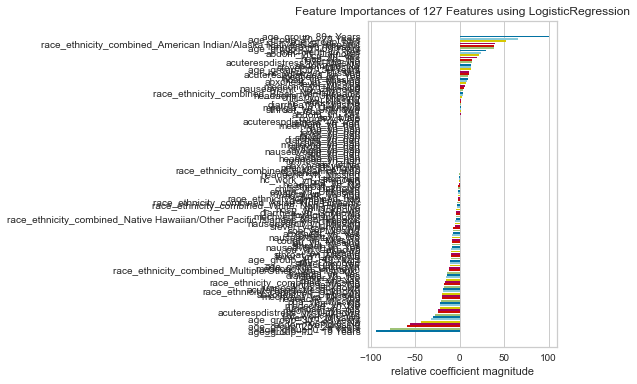

<AxesSubplot:title={'center':'Feature Importances of 127 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [22]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model)
viz.fit(X_train, y_train)
viz.show(relative=False, stack = True)

In [23]:
viz.feature_importances_

array([-9.41121326e+01, -7.82757680e+01, -5.97072609e+01, -5.65344364e+01,
       -4.37315485e+01, -3.29509599e+01, -3.04526586e+01, -2.78804046e+01,
       -2.43627939e+01, -2.42619289e+01, -2.25380919e+01, -2.25074806e+01,
       -2.23540660e+01, -2.17322913e+01, -2.04840268e+01, -1.96617607e+01,
       -1.95381970e+01, -1.94233821e+01, -1.89991406e+01, -1.79560897e+01,
       -1.75466162e+01, -1.63110136e+01, -1.56723151e+01, -1.52768689e+01,
       -1.40428332e+01, -1.40315468e+01, -1.26891638e+01, -1.25838816e+01,
       -1.11802890e+01, -1.10178123e+01, -1.09759830e+01, -1.03182597e+01,
       -1.00161892e+01, -9.76962391e+00, -9.53809241e+00, -9.44787938e+00,
       -9.24789514e+00, -9.24351612e+00, -9.17973666e+00, -9.13485527e+00,
       -8.80244537e+00, -8.49517262e+00, -7.81007031e+00, -7.80212027e+00,
       -7.11355031e+00, -5.79069852e+00, -5.22662036e+00, -5.19643217e+00,
       -4.82046478e+00, -4.61727774e+00, -4.36622466e+00, -4.25576188e+00,
       -4.06148497e+00, -

In [27]:
viz.features_

array(['age_group_10 - 19 Years', 'age_group_0 - 9 Years',
       'age_group_20 - 29 Years', 'abdom_yn_Missing', 'hosp_yn_No',
       'age_group_30 - 39 Years', 'fever_yn_Missing', 'hc_work_yn_Yes',
       'acuterespdistress_yn_Unknown', 'mechvent_yn_No', 'runnose_yn_Yes',
       'medcond_yn_No', 'icu_yn_No', 'pna_yn_Missing', 'headache_yn_Yes',
       'mechvent_yn_Missing', 'abxchest_yn_Unknown',
       'race_ethnicity_combined_Unknown', 'acuterespdistress_yn_No',
       'runnose_yn_Unknown', 'runnose_yn_No',
       'race_ethnicity_combined_Missing', 'chills_yn_Yes', 'sfever_yn_No',
       'diarrhea_yn_Yes', 'myalgia_yn_Yes',
       'race_ethnicity_combined_Multiple/Other, Non-Hispanic ',
       'medcond_yn_Unknown', 'age_group_Unknown', 'sfever_yn_Yes',
       'sex_Unknown', 'age_group_40 - 49 Years', 'fever_yn_Unknown',
       'sthroat_yn_Missing', 'sex_Female', 'icu_yn_Unknown',
       'nauseavomit_yn_Yes', 'sthroat_yn_Yes', 'icu_yn_Missing',
       'cough_yn_Missing', 'nauseavomit

In [31]:
feature_data = dict(zip(viz.features_,viz.feature_importances_))
feature_data

{'age_group_10 - 19 Years': -94.1121325523286,
 'age_group_0 - 9 Years': -78.27576802192763,
 'age_group_20 - 29 Years': -59.7072609194558,
 'abdom_yn_Missing': -56.53443642826925,
 'hosp_yn_No': -43.731548453626544,
 'age_group_30 - 39 Years': -32.95095987420558,
 'fever_yn_Missing': -30.452658580795305,
 'hc_work_yn_Yes': -27.880404559977862,
 'acuterespdistress_yn_Unknown': -24.36279390504799,
 'mechvent_yn_No': -24.26192893547899,
 'runnose_yn_Yes': -22.53809186469382,
 'medcond_yn_No': -22.507480618798166,
 'icu_yn_No': -22.354066014662898,
 'pna_yn_Missing': -21.73229134044773,
 'headache_yn_Yes': -20.48402684455329,
 'mechvent_yn_Missing': -19.661760740012607,
 'abxchest_yn_Unknown': -19.53819701869363,
 'race_ethnicity_combined_Unknown': -19.42338210800175,
 'acuterespdistress_yn_No': -18.99914057576222,
 'runnose_yn_Unknown': -17.956089740565968,
 'runnose_yn_No': -17.54661618369925,
 'race_ethnicity_combined_Missing': -16.31101355372909,
 'chills_yn_Yes': -15.67231513041577,


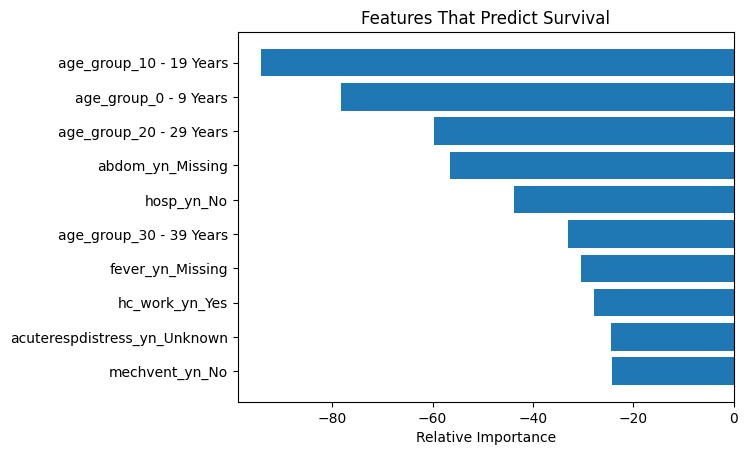

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()
viz_features = viz.features_
top_ten_features = viz_features[:10]
feature_importance = viz.feature_importances_
top_ten_importance = feature_importance[:10]

important_features = top_ten_features
y_pos = np.arange(len(top_ten_features))
performance = top_ten_importance

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(important_features)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficient Magnitude')
ax.set_title('Features That Predict Survival')

plt.show()

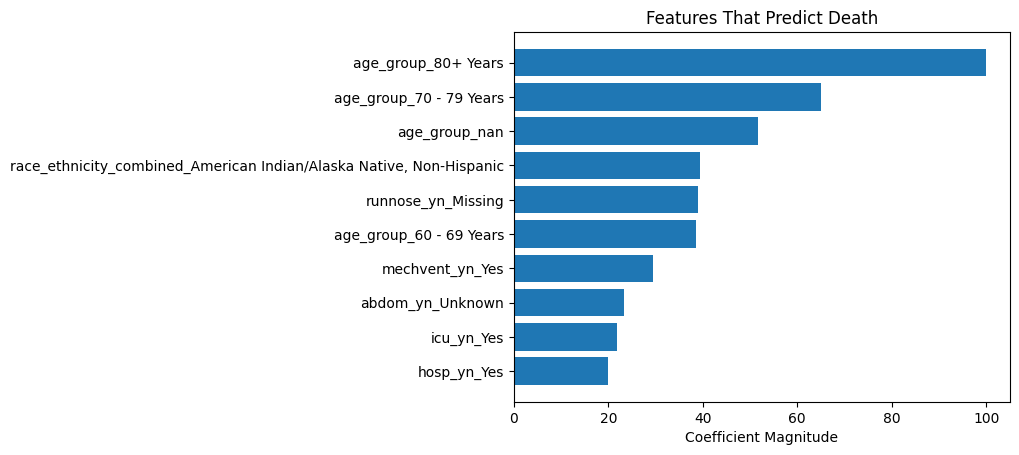

In [39]:
plt.rcdefaults()
fig2, ax2 = plt.subplots()
bottom_ten_features = viz_features[117:127]
bottom_ten_importance = feature_importance[117:127]

important_features = bottom_ten_features
y_pos = np.arange(len(bottom_ten_features))
performance = bottom_ten_importance

ax2.barh(y_pos, performance, align='center')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(bottom_ten_features)
#ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_xlabel('Coefficient Magnitude')
ax2.set_title('Features That Predict Death')

plt.show()

In [24]:
#model = RadiusNeighborsClassifier(radius=35.0, p=4, outlier_label="most_frequent").fit(X_train, y_train)
#_ = classification_report(shot_in_the_dark, X_test, y_test, classes=BLBLS, support=True, is_fitted=True)
shot_in_the_dark.score(X_test, y_test)

0.9525499497985489

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


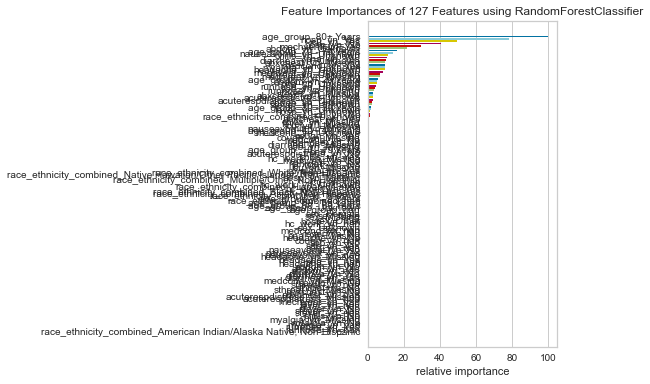

<AxesSubplot:title={'center':'Feature Importances of 127 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [25]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(shot_in_the_dark)
viz.fit(X_train, y_train)
viz.show()
#shot_in_the_dark.feature_importances_

In [40]:
important_stuff = zip(viz.features_,viz.feature_importances_)


In [42]:
important_stuff = list(important_stuff)

In [43]:
important_stuff

[('race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic', 0.0),
 ('runnose_yn_nan', 0.0),
 ('runnose_yn_Yes', 0.0),
 ('myalgia_yn_nan', 0.0),
 ('myalgia_yn_No', 0.0),
 ('myalgia_yn_Missing', 0.0),
 ('chills_yn_nan', 0.0),
 ('chills_yn_No', 0.0),
 ('sfever_yn_nan', 0.0),
 ('sfever_yn_Yes', 0.0),
 ('sfever_yn_No', 0.0),
 ('fever_yn_nan', 0.0),
 ('fever_yn_Yes', 0.0),
 ('mechvent_yn_nan', 0.0),
 ('acuterespdistress_yn_nan', 0.0),
 ('acuterespdistress_yn_Missing', 0.0),
 ('abxchest_yn_nan', 0.0),
 ('abxchest_yn_No', 0.0),
 ('sthroat_yn_Missing', 0.0),
 ('sthroat_yn_No', 0.0),
 ('sthroat_yn_nan', 0.0),
 ('cough_yn_No', 0.0),
 ('medcond_yn_Missing', 0.0),
 ('diarrhea_yn_nan', 0.0),
 ('diarrhea_yn_Yes', 0.0),
 ('diarrhea_yn_No', 0.0),
 ('abdom_yn_nan', 0.0),
 ('abdom_yn_Yes', 0.0),
 ('abdom_yn_No', 0.0),
 ('headache_yn_nan', 0.0),
 ('pna_yn_nan', 0.0),
 ('headache_yn_Yes', 0.0),
 ('headache_yn_Missing', 0.0),
 ('nauseavomit_yn_nan', 0.0),
 ('nauseavomit_yn_Yes', 0.0),
 ('nausea

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


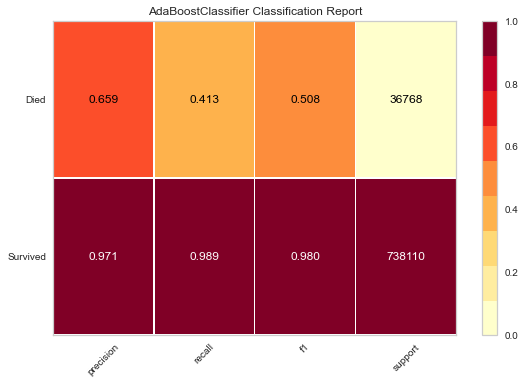

In [27]:


classes = ["Survived","Died"]
aDamodel = AdaBoostClassifier(n_estimators=25).fit(X_train, y_train)
_ = classification_report(aDamodel, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


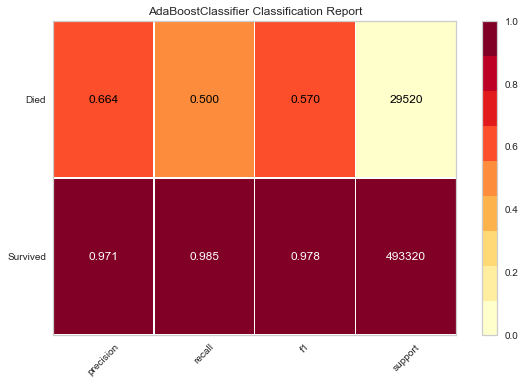

In [30]:
classes = ["Survived","Died"]
aDamodel_no_unknowns = AdaBoostClassifier(n_estimators=25).fit(X_train_no_unknowns, y_train_no_unknowns)
_ = classification_report(aDamodel_no_unknowns, X_test_no_unknowns, y_test_no_unknowns, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


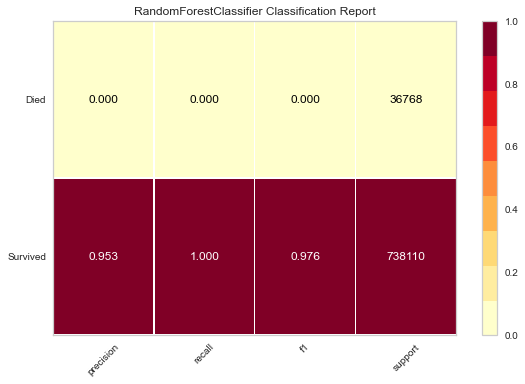

In [20]:

classes = ["Survived","Died"]
_ = classification_report(shot_in_the_dark, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


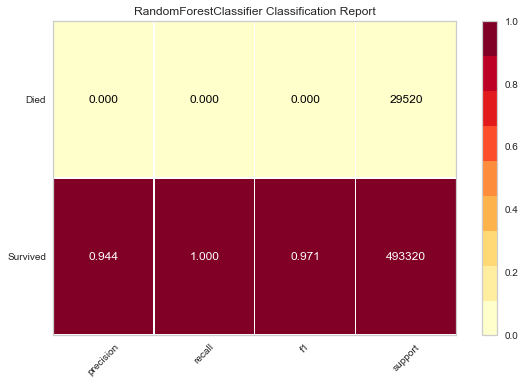

In [21]:
classes = ["Survived","Died"]
#no_unknown_aDamodel = AdaBoostClassifier(n_estimators=25).fit(X_train, y_train)
_ = classification_report(shot_in_the_dark_no_unknowns, X_test_no_unknowns, y_test_no_unknowns, classes=classes, support=True, is_fitted=True)

In [25]:
from sklearn.model_selection import GridSearchCV
#,'criterion':['gini', 'entropy']
parameters = {'n_estimators':[200], 'max_features':[2,8,15]}
whats_my_name_again = RandomForestClassifier()
gsCV = GridSearchCV(whats_my_name_again, parameters)
gsCV.fit(X_train, y_train)


KeyboardInterrupt: 